11/6


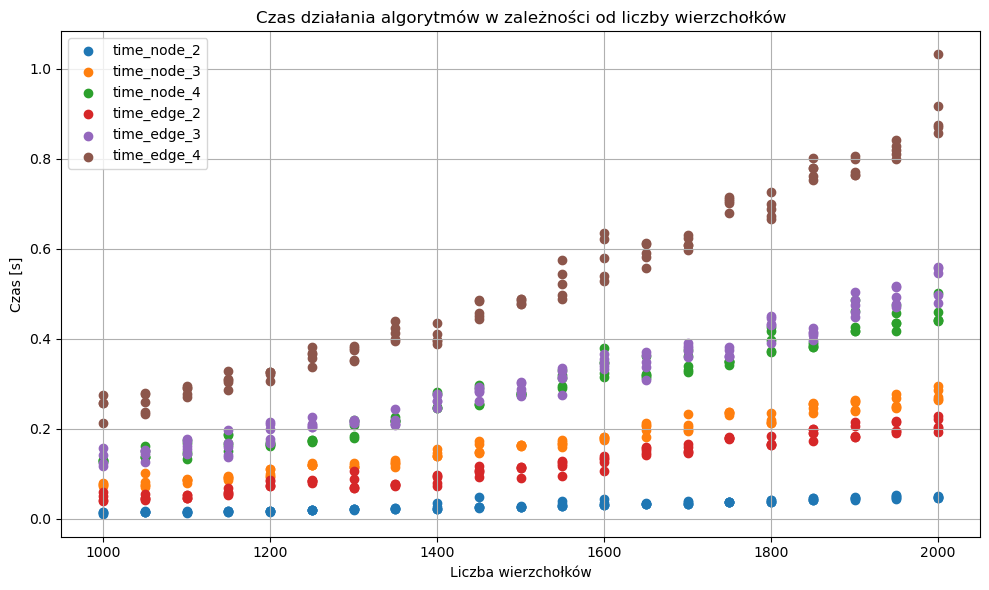

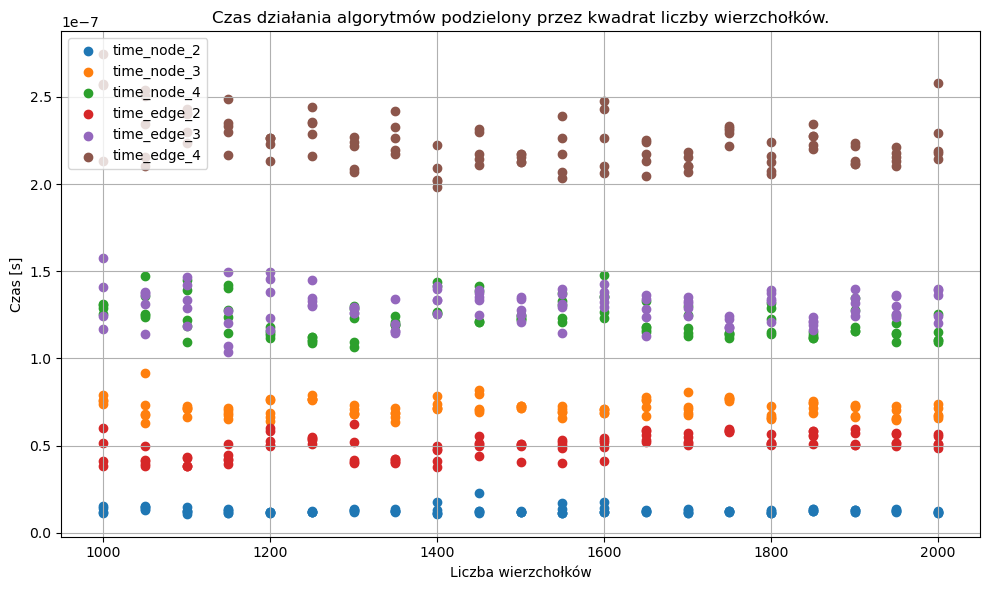

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.ticker import FuncFormatter

from fractions import Fraction

harmonic_number = lambda n: sum(Fraction(1, d) for d in range(1, n+1))

print(harmonic_number(3))
# Load the provided CSV file
data_file_path = '../results/perf/summary_time.csv'
data_df = pd.read_csv(data_file_path)
data_df = data_df[1:490]

data_df['edges'] = data_df['n'] 
data_df = data_df.drop(columns=['n'])
data_df = data_df.drop(columns=['m'])
data_df = data_df.drop(columns=['alpha'])
data_df = data_df.drop(columns=['calculated_hashes_node_2', 'calculated_hashes_node_4', 'calculated_hashes_node_3', 'calculated_hashes_edge'])

def create_plot(data_df, plot_file_path, plot_title):
    plt.figure(figsize=(10, 6))

    for column in data_df.columns[1:]:
        plt.scatter(data_df['edges'], data_df[column], label=column)

    plt.xlabel('Liczba wierzchołków')
    plt.ylabel('Czas [s]')
    plt.title(plot_title)
    #plt.yscale('log', base=2)
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()

    plt.savefig(plot_file_path)
    plt.show()

# Save the plot to a file
plot_file_path = 'time_matrix_all.png'
create_plot(data_df, plot_file_path, 'Czas działania algorytmów w zależności od liczby wierzchołków')

for column in data_df.columns[1:]:
    data_df[column] = data_df[column] / (data_df['edges'] * data_df['edges'])

plot_file_path = 'time_matrix_normalized.png'
create_plot(data_df, plot_file_path, 'Czas działania algorytmów podzielony przez kwadrat liczby wierzchołków.')

